In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
btc = pd.read_csv('../data/btc_daily.csv')

<Axes: xlabel='Days'>

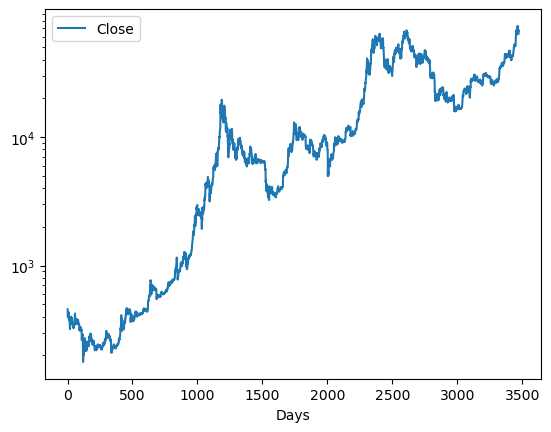

In [3]:
btc.plot(x='Days', y='Close', logy=True)

In [4]:
btc['log_price'] = np.log(btc['Close'])

In [5]:
btc

,Unnamed: 0,Close,Days,log_price
0,0,457.334015,1,6.125414
1,1,424.440002,2,6.050771
2,2,394.795990,3,5.978369
3,3,408.903992,4,6.013480
4,4,398.821014,5,5.988513
...,...,...,...,...
3467,3467,69403.773438,3468,11.147697
3468,3468,65315.117188,3469,11.086979
3469,3469,68390.625000,3470,11.132991
3470,3470,67548.593750,3471,11.120603


<Axes: xlabel='Days', ylabel='ln(price)'>

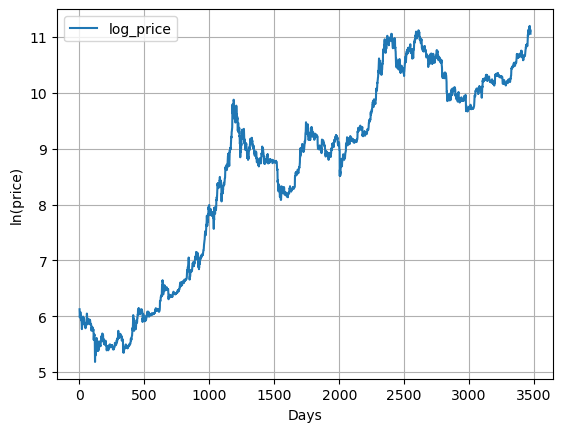

In [6]:
btc.plot(x='Days', y='log_price', ylabel='ln(price)', grid=True)

<Axes: xlabel='Days', ylabel='log_price'>

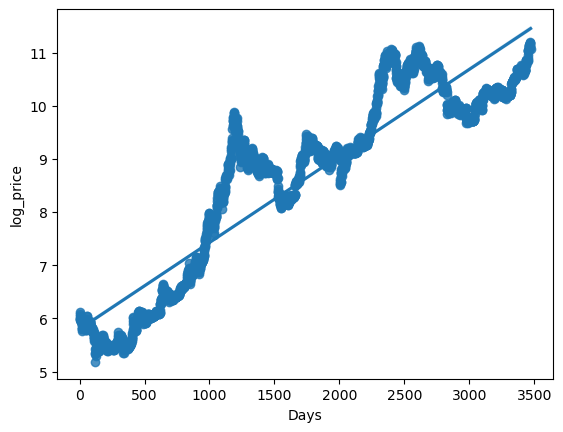

In [7]:
sns.regplot(data=btc, x='Days', y='log_price')

In [11]:
from sklearn.linear_model import LinearRegression

x = np.array(btc['log_price']).reshape(-1, 1)
y = btc['Days']

In [12]:
reg = LinearRegression().fit(x, y)

In [13]:
reg.score(x
          
          , y)

0.8503932350404075

In [15]:
reg.coef_

array([522.28552616])

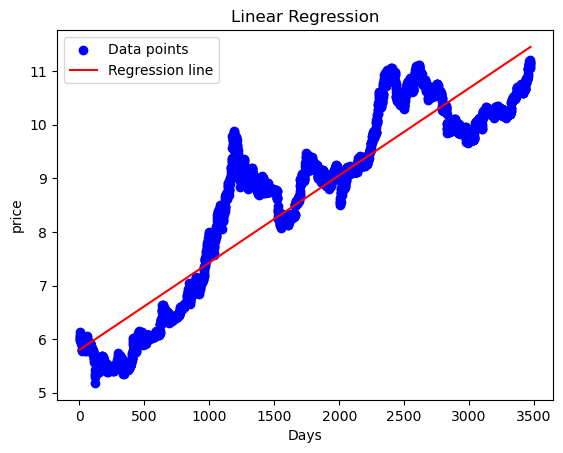

Slope: 0.001628215204976068
Intercept: 5.799433177039802
R-squared: 0.8503932350404075


In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Preparing the data for linear regression
X = btc[['Days']]  # Predictor variable
y = btc['log_price']    # Response variable

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Getting the slope and intercept of the line
slope = model.coef_[0]
intercept = model.intercept_

# Making predictions
y_pred = model.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Data points')           # Plotting the actual data points
plt.plot(X, y_pred, color='red', label='Regression line')      # Plotting the regression line
plt.xlabel('Days')
plt.ylabel('price')
plt.title('Linear Regression')
plt.legend()

# Display the plot
plt.show()

# Optionally, you can print out the slope and intercept, and the R-squared value
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {model.score(X, y)}")


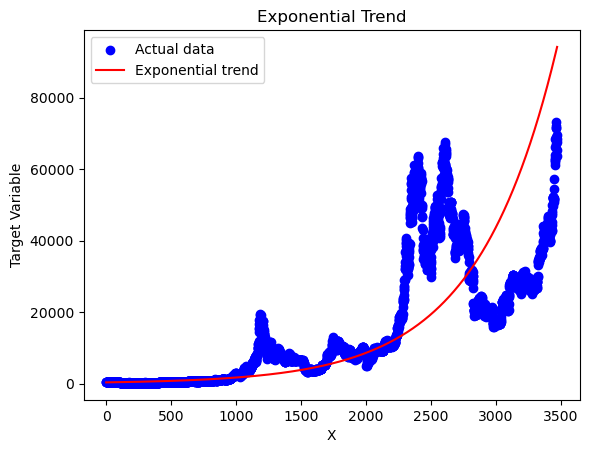

Slope of log-linear model: 0.001628215204976068
Intercept of log-linear model: 5.799433177039802
R-squared: 0.8503932350404075


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has columns 'x' and 'log_y'
# df = your_dataframe_here
# Make sure y is the logarithm of the target variable

# Preparing the data for linear regression
X = btc[['Days']]  # Predictor variable
log_y = btc['log_price']    # Logarithm of the response variable

# Create a linear regression model
model = LinearRegression()
model.fit(X, log_y)

# Getting the slope and intercept of the line
slope = model.coef_[0]
intercept = model.intercept_

# Making predictions
log_y_pred = model.predict(X)

# Converting logarithmic predictions back to the original scale
y_pred_exp = np.exp(log_y_pred)

# Plotting
plt.scatter(X, np.exp(log_y), color='blue', label='Actual data')          # Plot actual data
plt.plot(X, y_pred_exp, color='red', label='Exponential trend')  # Plot exponential trend

plt.xlabel('X')
plt.ylabel('Target Variable')
plt.title('Exponential Trend')
plt.legend()

# Display the plot
plt.show()

# Optionally, print out the slope and intercept, and the R-squared value
print(f"Slope of log-linear model: {slope}")
print(f"Intercept of log-linear model: {intercept}")
print(f"R-squared: {model.score(X, log_y)}")


/Users/attepiltonen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


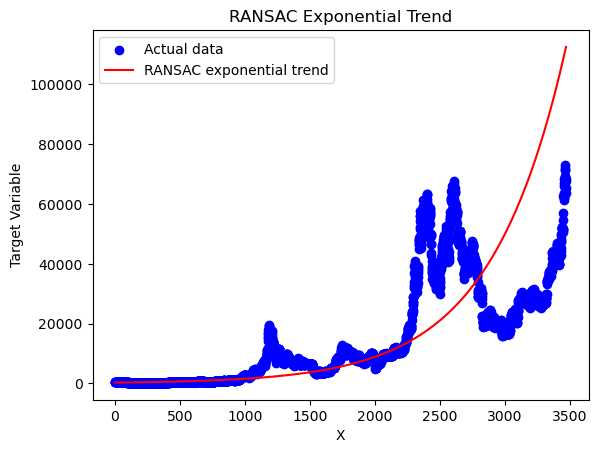

R-squared for inliers: 0.8860597932198705


In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RANSACRegressor, LinearRegression
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has columns 'x' and 'log_y'
# df = your_dataframe_here
# Make sure log_y is the logarithm of the target variable

# Preparing the data for linear regression
X = btc[['Days']]  # Predictor variable
log_y = btc['log_price']    # Logarithm of the response variable

# Create a RANSAC regressor with a linear model
ransac = RANSACRegressor(base_estimator=LinearRegression())
ransac.fit(X, log_y)

# Making predictions
log_y_pred_ransac = ransac.predict(X)

# Converting logarithmic predictions back to the original scale
y_pred_exp_ransac = np.exp(log_y_pred_ransac)

# Plotting
plt.scatter(X, np.exp(log_y), color='blue', label='Actual data')            # Plot actual data
plt.plot(X, y_pred_exp_ransac, color='red', label='RANSAC exponential trend')  # Plot RANSAC trend

plt.xlabel('X')
plt.ylabel('Target Variable')
plt.title('RANSAC Exponential Trend')
plt.legend()

# Display the plot
plt.show()

# Optionally, print out the R-squared value for the RANSAC model
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(f"R-squared for inliers: {ransac.score(X[inlier_mask], log_y[inlier_mask])}")


/Users/attepiltonen/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


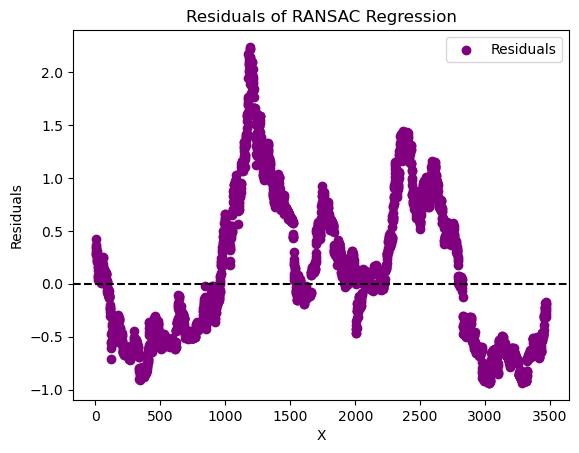

In [21]:
# Create a RANSAC regressor with a linear model
ransac = RANSACRegressor(base_estimator=LinearRegression())
ransac.fit(X, log_y)

# Making predictions
log_y_pred_ransac = ransac.predict(X)

# Calculating residuals
residuals = log_y - log_y_pred_ransac

# Plotting residuals
plt.scatter(X, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals of RANSAC Regression')
plt.legend()

# Display the plot
plt.show()


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'residuals' is an array or list of your residual values
# residuals = ...

# Compute the Fast Fourier Transform (FFT)
fft_res = np.fft.fft(residuals)
fft_freq = np.fft.fftfreq(len(residuals))

# Extracting amplitude and corresponding frequencies
fft_amp = np.abs(fft_res)

# Plotting the Fourier Transform results
plt.figure(figsize=(100, 100))
plt.plot(fft_freq, fft_amp)
plt.title('Fourier Analysis of Residuals')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


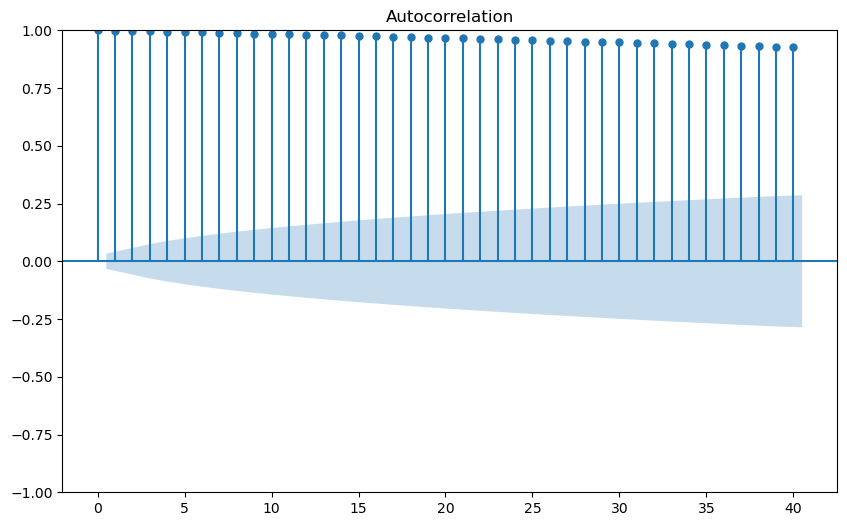

In [24]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'residuals' is your residuals array
# residuals = ...

# Plot the autocorrelation function
fig, ax = plt.subplots(figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax)
plt.show()
